# Image Caption Generator

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import re
import cv2

import os
from tqdm import tqdm

### Dataset Loading

In [2]:
PATH = 'Dataset/'

IMAGE_PATH = PATH + 'images/'
LABEL_PATH = PATH + 'captions.csv'

In [4]:
# Read LABEL_PATH using pandas
df = pd.read_csv(LABEL_PATH, delimiter=',')

In [5]:
df.head()

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


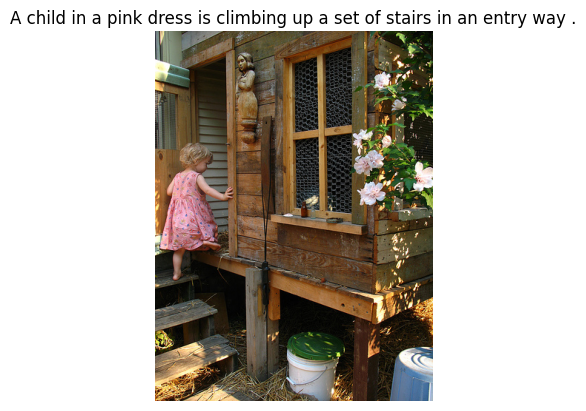

In [7]:
# plot image and caption from the dataframe
def plot_image_caption(df, idx):
    img = plt.imread(IMAGE_PATH + df.iloc[idx]['image'])
    plt.imshow(img)
    plt.title(df.iloc[idx]['caption'])
    plt.axis('off')
    plt.show()

plot_image_caption(df, 0)

In [8]:
Images = []
Captions = []

In [9]:
Captions = df['caption'].values

In [8]:
captions = []
for i in Captions:
    i = i.lower()
    # Clean captions and remove puncuations usng regex
    i = re.sub(r'[^\w\s]', '', i)
    captions.append(i)

In [9]:
captions[0]

'a child in a pink dress is climbing up a set of stairs in an entry way '

### Word Embedding

In [10]:
# add start and end to captions

newCaps = []
maxLen = 0
wordList = ['','START','END']
for caption in captions :
    cap = ['START']
    captionWords = caption.strip().split(' ')
    cap.extend(captionWords)
    for i in captionWords :
        if i not in wordList :
            wordList.append(i)
    cap.append('END')
    if len(cap) > maxLen :
        maxLen = len(cap)
    newCaps.append(cap)

In [11]:
maxLen

39

In [12]:
len(wordList)

8831

In [13]:
wordList

['',
 'START',
 'END',
 'a',
 'child',
 'in',
 'pink',
 'dress',
 'is',
 'climbing',
 'up',
 'set',
 'of',
 'stairs',
 'an',
 'entry',
 'way',
 'girl',
 'going',
 'into',
 'wooden',
 'building',
 'little',
 'playhouse',
 'the',
 'to',
 'her',
 'cabin',
 'black',
 'dog',
 'and',
 'spotted',
 'are',
 'fighting',
 'tricolored',
 'playing',
 'with',
 'each',
 'other',
 'on',
 'road',
 'white',
 'brown',
 'spots',
 'staring',
 'at',
 'street',
 'two',
 'dogs',
 'different',
 'breeds',
 'looking',
 'pavement',
 'moving',
 'toward',
 'covered',
 'paint',
 'sits',
 'front',
 'painted',
 'rainbow',
 'hands',
 'bowl',
 'sitting',
 'large',
 'small',
 'grass',
 'plays',
 'fingerpaints',
 'canvas',
 'it',
 'there',
 'pigtails',
 'painting',
 'young',
 'outside',
 'man',
 'lays',
 'bench',
 'while',
 'his',
 'by',
 'him',
 'which',
 'also',
 'tied',
 'sleeping',
 'next',
 'shirtless',
 'lies',
 'park',
 'laying',
 'holding',
 'leash',
 'ground',
 'orange',
 'hat',
 'starring',
 'something',
 'wears

In [14]:
wordDic = {}
for i, word in enumerate(wordList) :
    wordDic[word] = i

In [15]:
wordDic['START'] , wordDic['END']

(1, 2)

In [16]:
Y = []
for i in range(len(newCaps)) :
    y = [wordDic[word] for word in newCaps[i]]
    y.extend(np.zeros(maxLen-len(y) , dtype=np.int32))
    # print(y,len(y))
    # break
    Y.append(y)

In [17]:
Image_Paths = df['image'].values

In [18]:
Images = []
c = 0 
for path in Image_Paths[:10000] :
    print(f'\r {c} - {path}',end='')
    img = cv2.imread('Dataset/images/'+path)
    img = cv2.resize(img,(64,64))
    Images.append(img)
    c += 1

Images = np.array(Images).astype('float32')/255.0

 9999 - 2470519275_65725fd38d.jpg

In [19]:
import pickle

# dump Images into pickle file
with open('Images.pkl','wb') as f:
    pickle.dump(Images,f)

In [20]:
# Load pickle
import pickle

with open('Images.pkl','rb') as f:
    Images = pickle.load(f)


In [21]:
Y= Y[:5000]
# Y = np.array(Y)
# print(Y.shape)

In [22]:
X1,X2,y = [],[],[]
for i in tqdm(range(5000)):
    for j in range(maxLen-1):
        X1.append(Images[i])
        seq = Y[i][:j+1]
        seq.extend(np.zeros(maxLen-len(seq) , dtype=np.int32))
        X2.append(seq)
        y.append(Y[i][j+1])
        # print(X2,y)
        # X2 = []
    # print(X2,y)

  3%|▎         | 168/5000 [00:00<00:02, 1673.64it/s]

100%|██████████| 5000/5000 [00:02<00:00, 2352.68it/s]


In [23]:
X1 = np.array(X1)
X2 = np.array(X2)
y = np.array(y)

In [24]:
X1.shape,X2.shape,y.shape

((190000, 64, 64, 3), (190000, 39), (190000,))

In [25]:
X2

array([[  1,   0,   0, ...,   0,   0,   0],
       [  1,   3,   0, ...,   0,   0,   0],
       [  1,   3,   4, ...,   0,   0,   0],
       ...,
       [  1,   3, 223, ...,   0,   0,   0],
       [  1,   3, 223, ...,   0,   0,   0],
       [  1,   3, 223, ...,   0,   0,   0]])

In [26]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset


from sklearn.model_selection import train_test_split

from torchsummary import summary
from torch.optim.lr_scheduler import StepLR

: 

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X1, X2, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)

In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train).permute(0, 3, 1, 2)  # Convert from HWC to CHW format
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val).permute(0, 3, 1, 2)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)


print(f"X_train_tensor shape: {X_train_tensor.shape}")
print(f"y_train_tensor shape: {y_train_tensor.shape}")
print(f"X_val_tensor shape: {X_val_tensor.shape}")
print(f"y_val_tensor shape: {y_val_tensor.shape}")

# Create PyTorch DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)


X_train_tensor shape: torch.Size([152000, 3, 64, 64])
y_train_tensor shape: torch.Size([152000, 39])
X_val_tensor shape: torch.Size([38000, 3, 64, 64])
y_val_tensor shape: torch.Size([38000, 39])


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import StepLR

class CNNRNNModel(nn.Module):
    def __init__(self, num_classes=len(wordList),max_len=39):  # Change to 63
        super(CNNRNNModel, self).__init__()
        
        # CNN layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        self.bn4 = nn.BatchNorm2d(256)
        
        # Fully connected layer to transform CNN output to RNN input
        self.fc1 = nn.Linear(256 * 5 * 12, 512*max_len)  # Adjust input size based on final CNN feature map size
        
        # RNN layers
        self.rnn = nn.LSTM(input_size=512, hidden_size=512, num_layers=2, batch_first=True, bidirectional=True)
        
        # Final fully connected layers
        self.fc2 = nn.Linear(1024, 2048)
        self.fc3 = nn.Linear(2048, num_classes)
        
    def forward(self, x):
        # CNN forward pass
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))

        # print(x.shape)

        # Flatten the output from the CNN
        x = x.view(x.size(0), -1)
        
        # Fully connected layer
        x = self.fc1(x)

        # print(x.shape)
        
        # Reshape for RNN input (batch_size, seq_length, input_size)
        x = x.view(x.size(0), 6, 512)  # Ensure the sequence length is 6
        
        # RNN forward pass
        x, _ = self.rnn(x)
        
        # Apply fully connected layers to each time step
        x = F.relu(self.fc2(x))
        x = F.dropout(x, p=0.5)
        x = self.fc3(x)
        
        return x

In [ ]:
def TrainModel(model, train_loader, val_loader, criterion, optimizer, scheduler, batch_size=32, num_epochs=100, patience=10, best_val_loss=float("inf") ):
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    # Training loop
    train_losses = []
    val_losses = []

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)
            
            # Forward pass
            outputs = model(images)
            labels = labels.argmax(2).view(-1)
            out_view = outputs.view(-1, len(wordList))
            loss = criterion(out_view, labels)
            # loss = nn.CTCLoss(blank=62)(outputs.permute(1, 0, 2), labels, torch.full((batch_size,), 6, dtype=torch.long), torch.full((batch_size,), 6, dtype=torch.long))

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            print(f'\r {i} - {train_loss}',end='')

        # Validation phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                
                # Forward pass
                outputs = model(images)
                labels = labels.argmax(2).view(-1)
                loss = criterion(outputs.view(-1, len(wordList)), labels)
                # loss = nn.CTCLoss(blank=62)(outputs.permute(1, 0, 2), labels, torch.full((batch_size,), 6, dtype=torch.long), torch.full((batch_size,), 6, dtype=torch.long))

                val_loss += loss.item()

                print(f'\r {i} - {val_loss}',end=' ')

        # Update the learning rate
        # scheduler.step(val_loss / len(val_loader))
        scheduler.step()

        # Save the losses
        train_losses.append(train_loss / len(train_loader))
        val_losses.append(val_loss / len(val_loader))

        # Check for early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            # Save the best model if required
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

        print(f"\rEpoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")

    return model, train_losses, val_losses

In [ ]:
model = CNNRNNModel(num_classes=len(wordList))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

print(model)

cuda
CNNRNNModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=15360, out_features=19968, bias=True)
  (rnn): LSTM(512, 512, num_layers=2, batch_first=True, bidirectional=True)
  (fc2): Linear(in_features=1024, out_features=2048, bias=True)
  (fc3): Linear(in_feat

In [42]:
# Train the model
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
scheduler = StepLR(optimizer, step_size=10, gamma=0.9)

model, train_losses, val_losses = TrainModel(model, train_dataset, val_dataset, criterion, optimizer, scheduler, batch_size=32, num_epochs=100, patience=10)

RuntimeError: Input type (unsigned char) and bias type (float) should be the same